<a href="https://colab.research.google.com/github/agmarrugo/computer-vision-utb/blob/main/notebooks/oneccc_detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contrasting concentric circle detection

Andres Marrugo, PhD    
Universidad Tecnológica de Bolívar

Adapted from [Lab 4][lab] by William Hoff.

[lab]: http://inside.mines.edu/~whoff/

The task for this assignment is to detect a contrasting concentric circle (CCC) target in a sequence of images from the video “oneCCC.mp4” on the course github repository. 

The target is a black ring surrounding a white dot. This feature is fairly unique in the image, because the centroid of the black ring will be very close to the centroid of the white dot. You should be able to detect the target in each image of the sequence, with no false detections.

![](https://github.com/agmarrugo/computer-vision-utb/raw/main/figures/detected_cc.gif)

Next, write code to compare the centroids of all the white regions with the centroids of all the black regions, and test whether they are closer than a threshold distance (you will have to experiment with the threshold). Draw a  rectangle at those locations.

Write a program that reads and displays each image of the video. Next, write code to threshold each image. As described in the lecture slides, local thresholding is more robust to intensity variations across the image, but for this scene, global thresholding works fine (i.e., using Otsu's thresholding method).

You may find the following functions useful.

- `cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)` to threshold the image.
- `cv2.morphologyEx(thImg, cv2.MORPH_OPEN, kernel)` to remove unwanted noise from the thresholded (binary) image.
- `cv2.connectedComponentsWithStats(openedImg, conn, cv2.CV_32S)` to get the labels of the connected components with stats like the centroids.
- `dist = np.linalg.norm(centroidsWhite[i] - centroidsBlack[j])` to compute the distance between two centroids.

As described in the lecture, you may need to apply some additional tests on the candidate targets to eliminate false detections. You can use some or all of these:

- The area of the black ring must be greater than the area of the white dot.
- The black bounding box must enclose the white bounding box.
- The "circularity" ratio of the outer region must be greater than some threshold. The circularity ratio is $R = 4*\pi*\text{area}/(\text{perimeter}^2)$. R is 1 for a circle, and $\pi/4$ for a square.

You may also use a [SimpleBlobDetector](https://learnopencv.com/blob-detection-using-opencv-python-c/), which provides many of these methods already implemented. 

### What to submit

1. A PDF file exported from the Jupyter notebook with all of the code and showing how it works.
2. The Jupyter `.ipynb` file.
3. A video file `detected_ccc.mp4` with the detected CCC in a bounding box. You can draw a crosshair or other things. Get creative.

In [1]:
# Let's start by loading the libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 

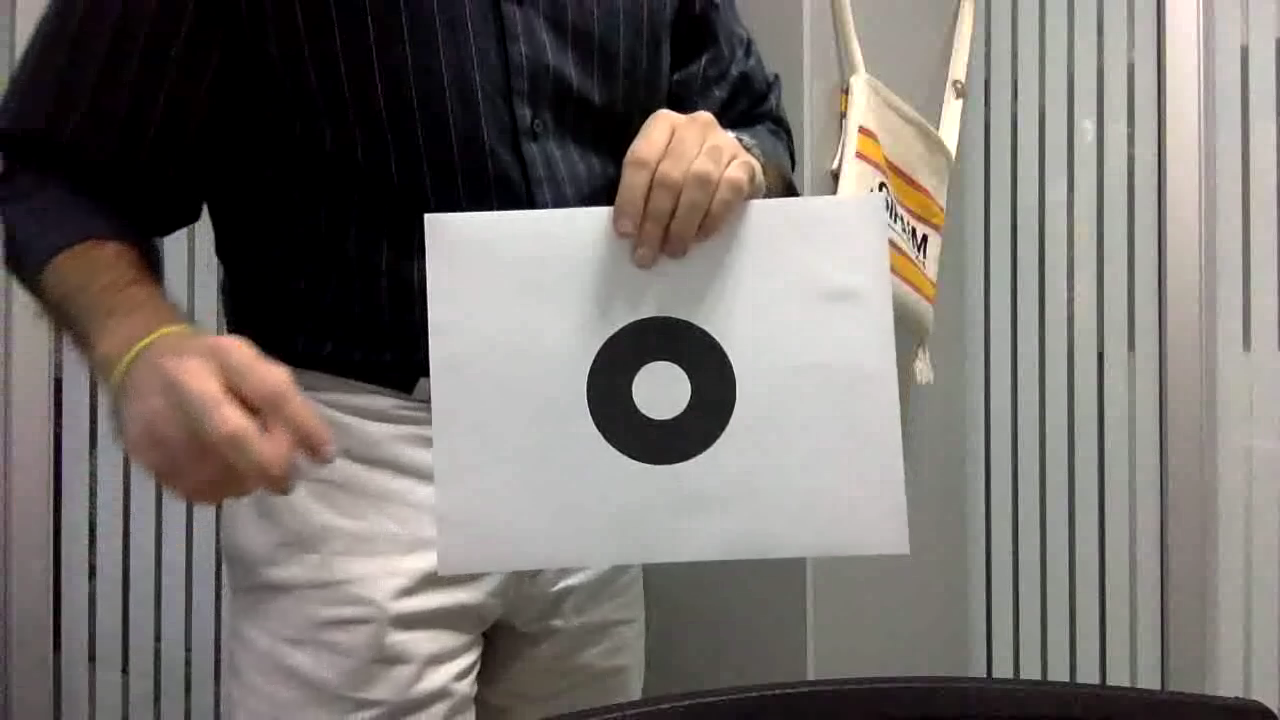

In [2]:
# You can design your program with one of the frames of the video

IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/raw/main/data/oneCC.png'

urllib.request.urlretrieve(IMAGE_URL, 'oneCC.png')

img = cv2.imread('oneCC.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img)

In [ ]:
# It would be best if you implement your code as a function

def ccc_detect(img):
# receives an image with a CCC as input
# and outputs the image with the CCC in
# bounding box

  return output

The following code allows you to read a video file and store as multidimensional array.

In [3]:
VIDEO_URL = 'https://github.com/agmarrugo/computer-vision-utb/raw/main/data/oneCC.mp4'

urllib.request.urlretrieve(VIDEO_URL, 'oneCC.mp4')


# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('oneCC.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
count = 0;

# image_array = np.empty(total) # array which will hold the images
image_array = []

while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  image_array.append(frame)
  
  if ret == True:
    continue
    # Display the resulting frame
    # cv2_imshow(frame)

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

Number of images in image_array: 231


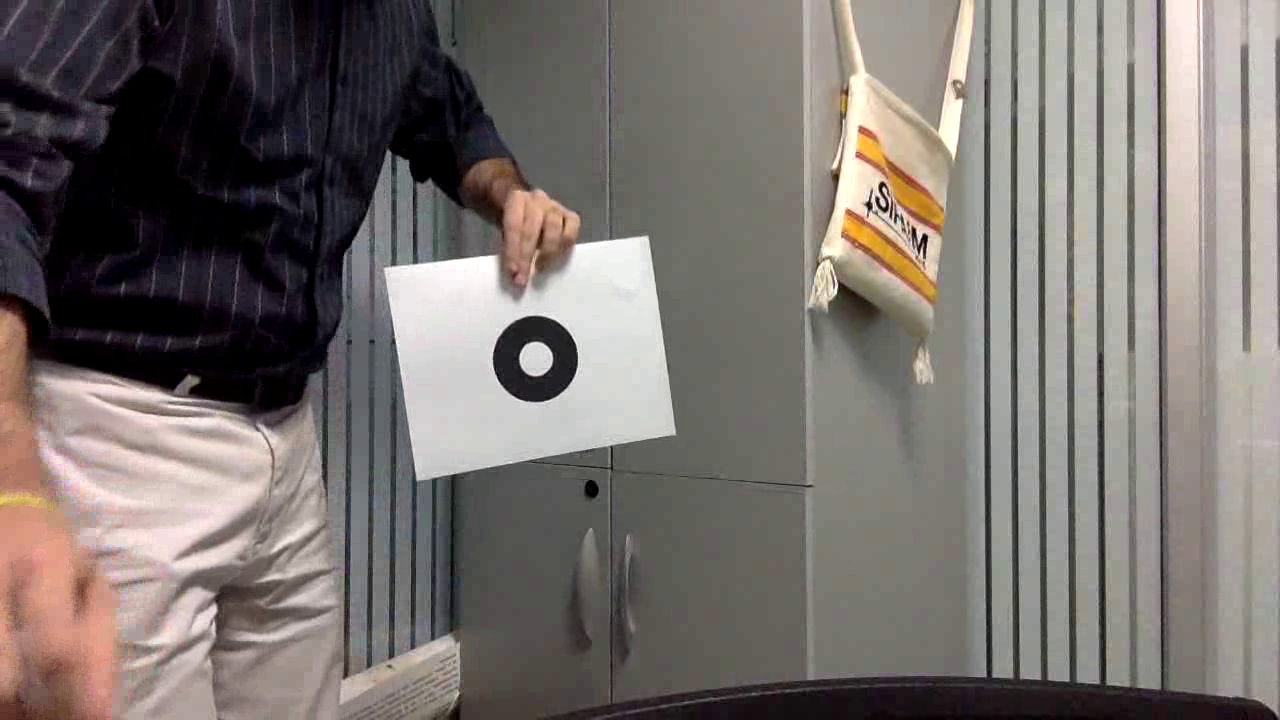

In [13]:
# Check that it works

# this will print the number of images in the file
print('Number of images in image_array:', len(image_array) - 1) 

# Try any index from 0 to len(image_array) - 2
cv2_imshow(image_array[200])

In [ ]:
# Finally, write video file by processing all frames

height, width, layers = img.shape
size = (width,height)

out = cv2.VideoWriter('detected_ccc.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, size) # 30 fps
 
for i in range(len(image_array) - 1):
  
  ccc_detected = ccc_detect(image_array[i]) # ccc_detect() is the function you have to implement

  out.write(ccc_detected)

out.release()